<a href="https://colab.research.google.com/github/sueshow/Kaggle/blob/main/Kaggle_SVM_Heart_Disease_UCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle - [Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci)

In [ ]:
!git clone https://github.com/sueshow/Kaggle.git

Cloning into 'Kaggle'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 52 (delta 12), reused 26 (delta 3), pack-reused 0
Unpacking objects: 100% (52/52), done.


In [ ]:
#若需要重新下載資料，先執行下面的語法：
#!rm -r /content/Kaggle

### Imporrt Package

In [ ]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc

### Read the data and show the first 5 rows

In [ ]:
df = pd.read_csv('/content/Kaggle/Content/Heart Disease UCI/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Exploratory Analysis

* There are thirteen features and one target as below:
  * age: The person's age in years
  * sex: The person's sex (1 = male, 0 = female)
  * cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
  * trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
  * chol: The person's cholesterol measurement in mg/dl
  * fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
  * restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
  * thalach: The person's maximum heart rate achieved
  * exang: Exercise induced angina (1 = yes; 0 = no)
  * oldpeak: ST depression induced by exercise relative to rest
  * slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
  * ca: The number of major vessels (0-3)
  * thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
  * target: Heart disease (0 = no, 1 = yes)

### Check for missing values and basic informations

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [ ]:
df.describe().T.style.bar(subset=['mean'], color='#205ff2')\
               .background_gradient(subset=['std'], cmap='Reds')\
               .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
age,303.000000,54.366337,9.082101,29.000000,47.500000,55.000000,61.000000,77.000000
sex,303.000000,0.683168,0.466011,0.000000,0.000000,1.000000,1.000000,1.000000
cp,303.000000,0.966997,1.032052,0.000000,0.000000,1.000000,2.000000,3.000000
trestbps,303.000000,131.623762,17.538143,94.000000,120.000000,130.000000,140.000000,200.000000
chol,303.000000,246.264026,51.830751,126.000000,211.000000,240.000000,274.500000,564.000000
fbs,303.000000,0.148515,0.356198,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,303.000000,0.528053,0.525860,0.000000,0.000000,1.000000,1.000000,2.000000
thalach,303.000000,149.646865,22.905161,71.000000,133.500000,153.000000,166.000000,202.000000
exang,303.000000,0.326733,0.469794,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,303.000000,1.039604,1.161075,0.000000,0.000000,0.800000,1.600000,6.200000


* Cholesterol has the highest mean value of 246.26 & also he highest standard deviation of 51.83

### Data Exploration

In [ ]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

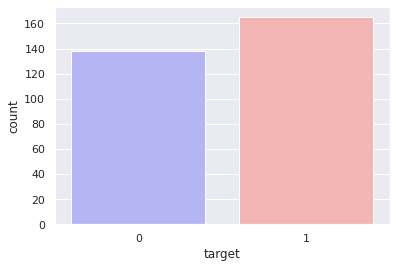

In [ ]:
sns.countplot(x='target', data=df, palette='bwr')
plt.show()

In [ ]:
countNoDisease = len(df[df.target==0])
countHaveDisease = len(df[df.target==1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


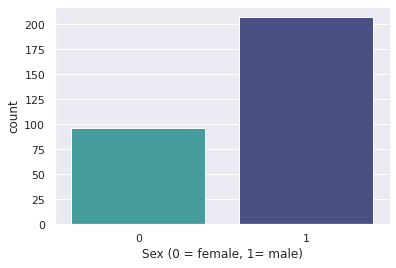

In [ ]:
sns.countplot(x='sex', data=df, palette='mako_r')
plt.xlabel('Sex (0 = female, 1= male)')
plt.show()

In [ ]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print('Percentage of Female Patients: {:.2f}%'.format((countFemale / (len(df.sex))*100)))
print('Percentage of Male Patients: {:.2f}%'.format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [ ]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


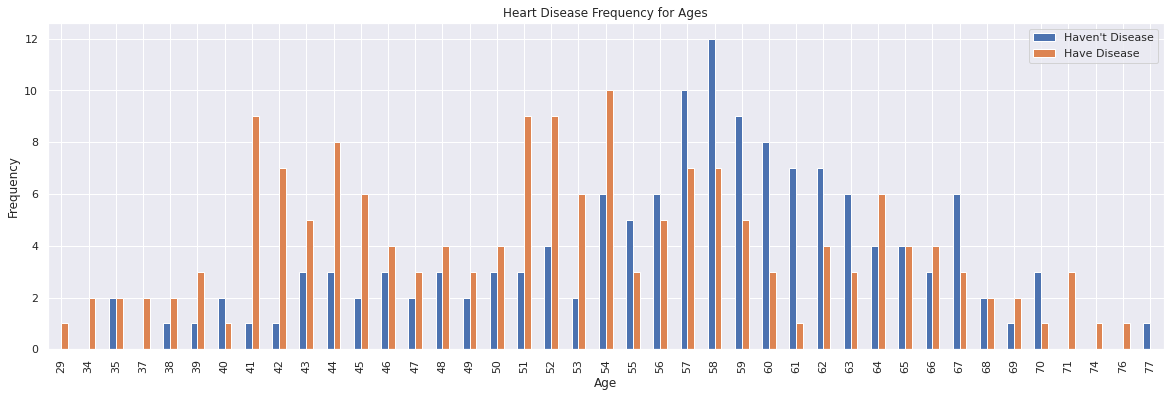

In [ ]:
pd.crosstab(df.age, df.target).plot(kind='bar', figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["Haven't Disease", "Have Disease"])
plt.savefig('heartDiseaseAndAges.png')
plt.show()

#### Distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



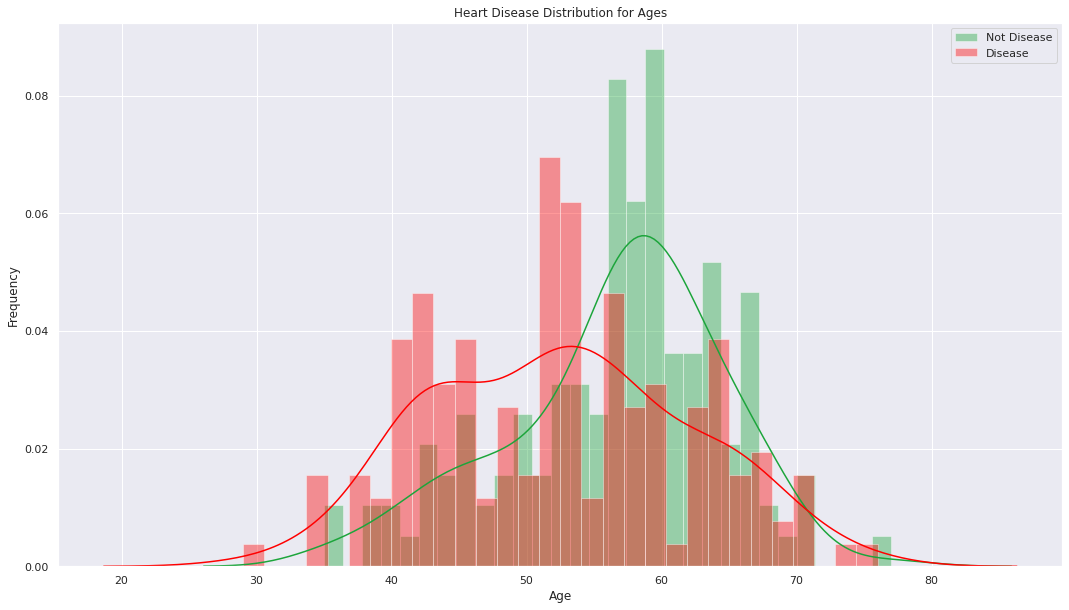

In [ ]:
#sns.set_style('whitegrid')
plt.figure(figsize=(18, 10))
sns.distplot(df.age[df['target'] == 0], bins=30, color='#1CA53B', label='Not Disease')
sns.distplot(df.age[df['target'] == 1], bins=30, color='red', label='Disease')
plt.legend()
plt.title('Heart Disease Distribution for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

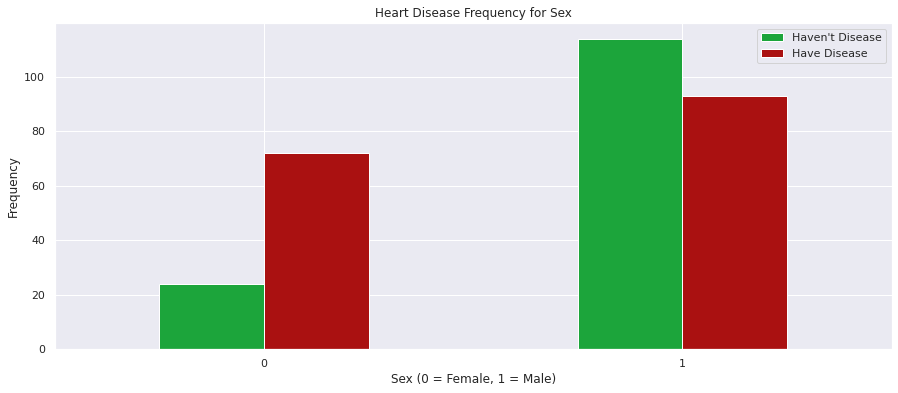

In [ ]:
pd.crosstab(df.sex, df.target).plot(kind='bar', figsize=(15,6), color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

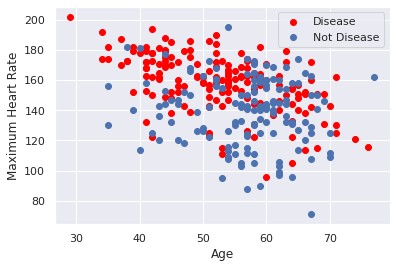

In [ ]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c='red')
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(['Disease', 'Not Disease'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()

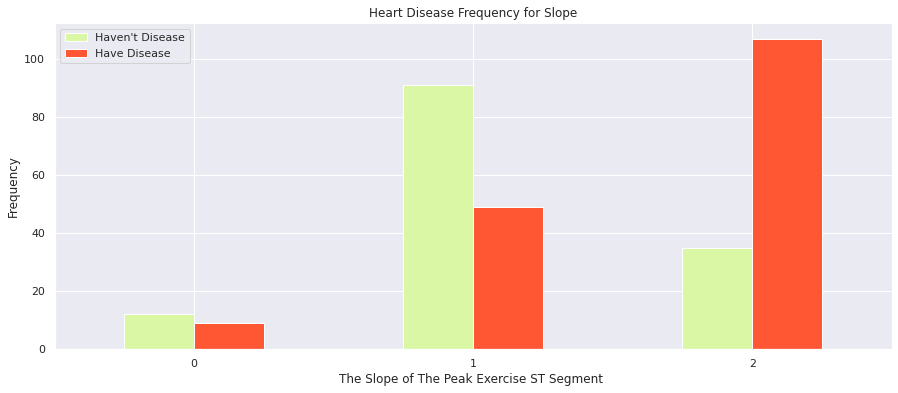

In [ ]:
pd.crosstab(df.slope, df.target).plot(kind='bar', figsize=(15,6), color=['#DAF7A6', '#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

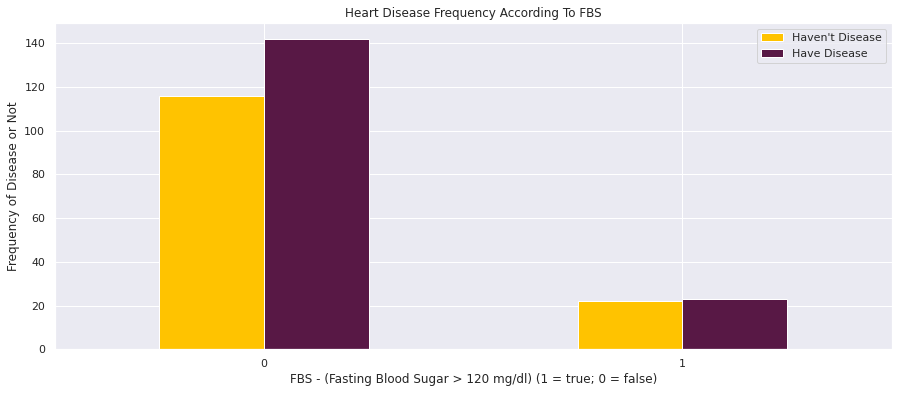

In [ ]:
pd.crosstab(df.fbs, df.target).plot(kind='bar', figsize=(15,6), color=['#FFC300', '#581845'])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

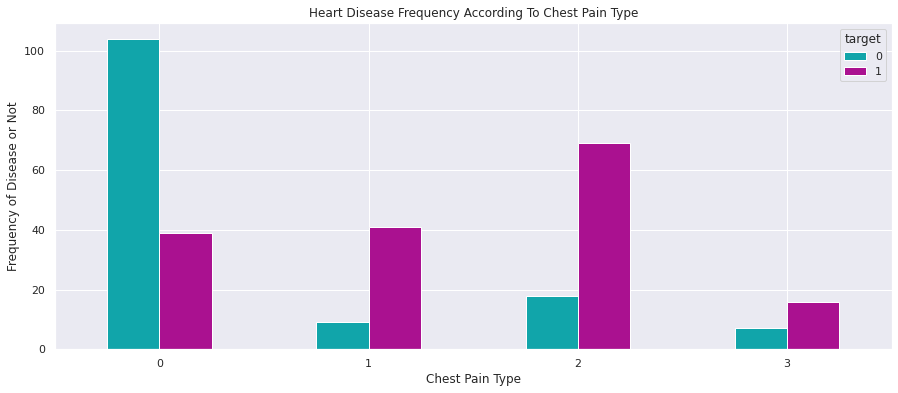

In [ ]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(15,6), color=['#11A5AA', '#AA1190'])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

* 一起觀察

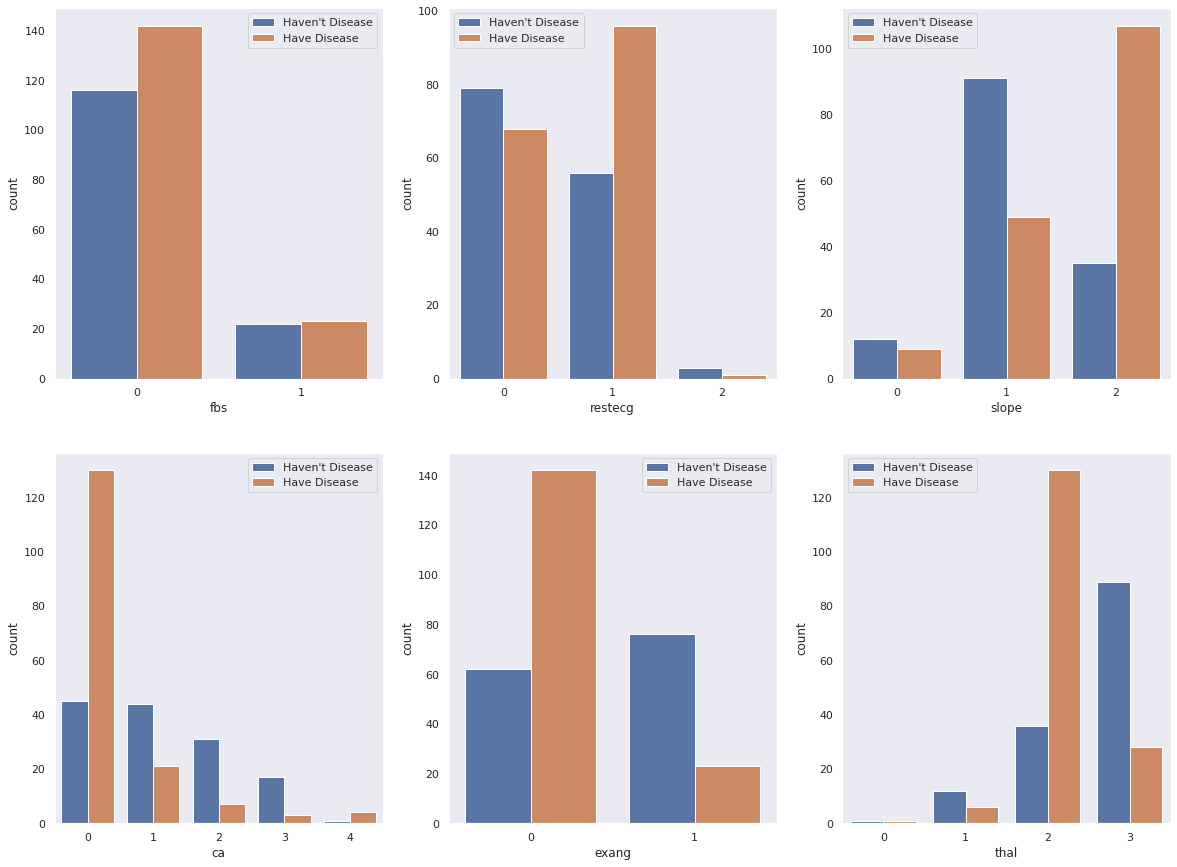

In [ ]:
plt.figure(figsize=(20,15))
sns.set_theme(style='dark')

plt.subplot(2,3,1)
sns.countplot(data=df, x='fbs', hue='target')
plt.legend(["Haven't Disease", "Have Disease"])

plt.subplot(2,3,2)
sns.countplot(data=df, x='restecg', hue='target')
plt.legend(["Haven't Disease", "Have Disease"])

plt.subplot(2,3,3)
sns.countplot(data=df, x='slope', hue='target')
plt.legend(["Haven't Disease", "Have Disease"])

plt.subplot(2,3,4)
sns.countplot(data=df, x='ca', hue='target')
plt.legend(["Haven't Disease", "Have Disease"])

plt.subplot(2,3,5)
sns.countplot(data=df, x='exang', hue='target')
plt.legend(["Haven't Disease", "Have Disease"])

plt.subplot(2,3,6)
sns.countplot(data=df, x='thal', hue='target')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

* This plot depicts an important relationship.
  * For example, in the 1st subplot of "fbs", it says that when fbs is zero, the target value zero is about 120 and target value 1 is 140, again when fbs is one, the target value for zero is about 20 and target value for one is just above 20.

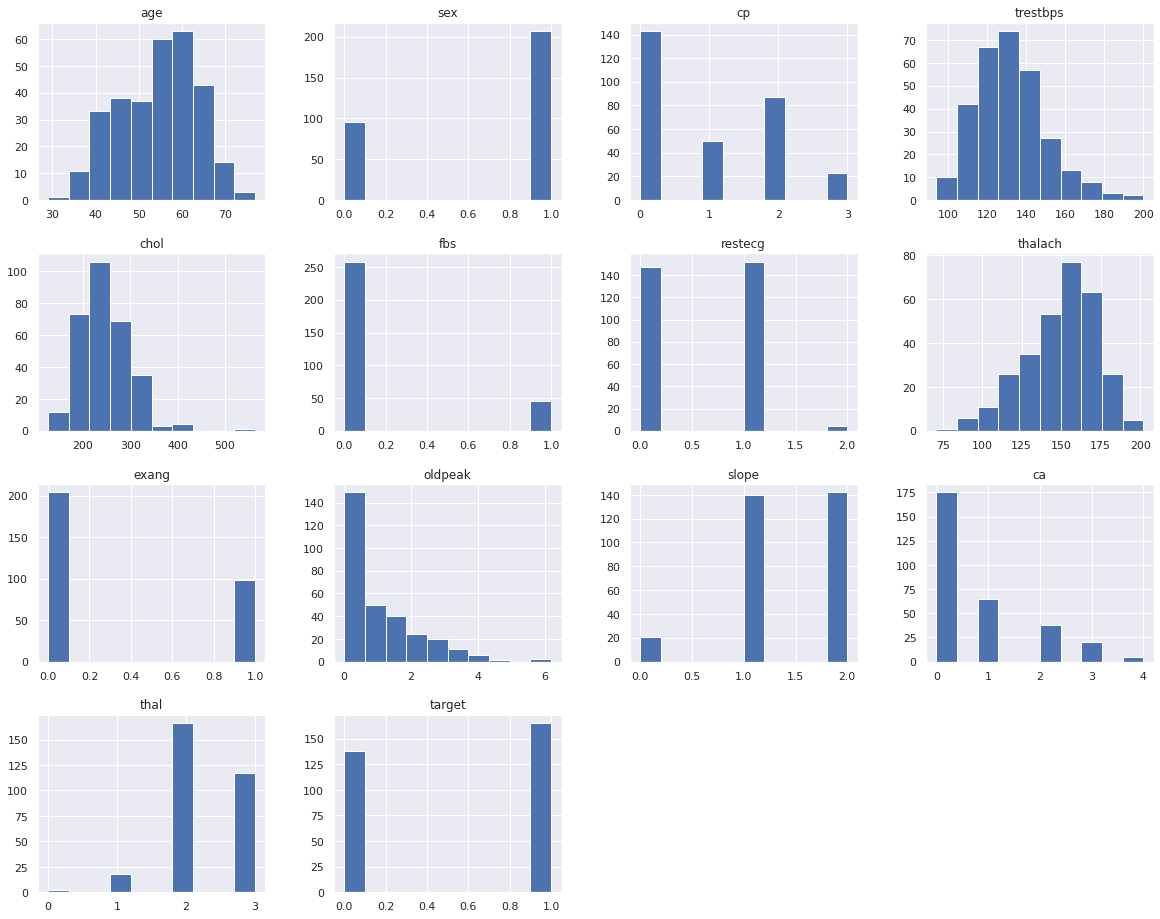

In [ ]:
df.hist(figsize=(20,16))
plt.show()

* This also depicts the counts of each value of each column. Here we can see the imblances in data too.
  * For example the fbs column has around 250 zero values, and about 20 one values.

#### Box Plot

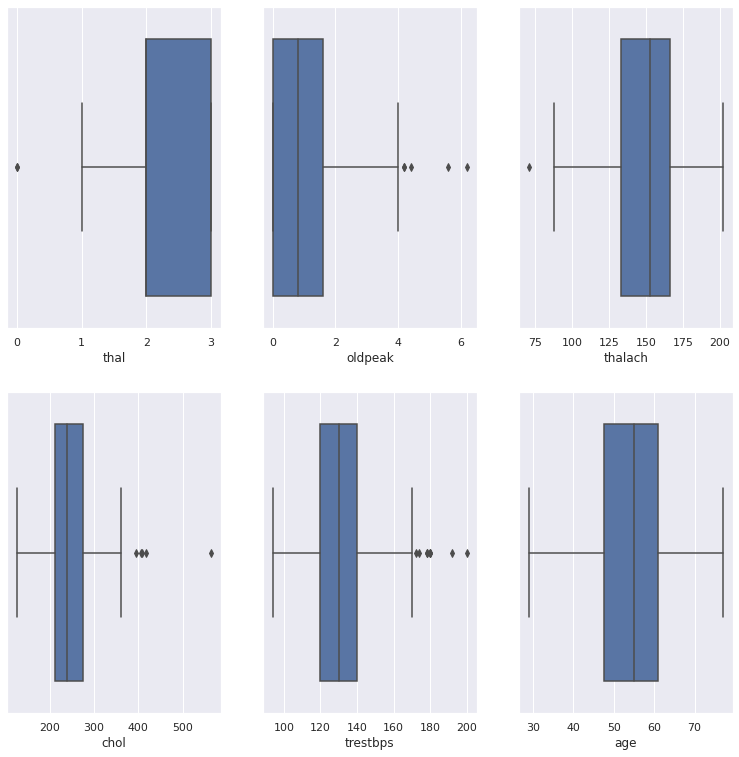

In [ ]:
plt.figure(figsize=(13,13))
sns.set_theme(style='darkgrid')

plt.subplot(2,3,1)
sns.boxplot(x='thal', data=df)
plt.subplot(2,3,2)
sns.boxplot(x='oldpeak', data=df)
plt.subplot(2,3,3)
sns.boxplot(x='thalach', data=df)
plt.subplot(2,3,4)
sns.boxplot(x='chol', data=df)
plt.subplot(2,3,5)
sns.boxplot(x='trestbps', data=df)
plt.subplot(2,3,6)
sns.boxplot(x='age', data=df)
plt.show()

In [ ]:
import plotly.express as px

fig = px.box(df, y='trestbps')
fig.show()

#### Heat Map

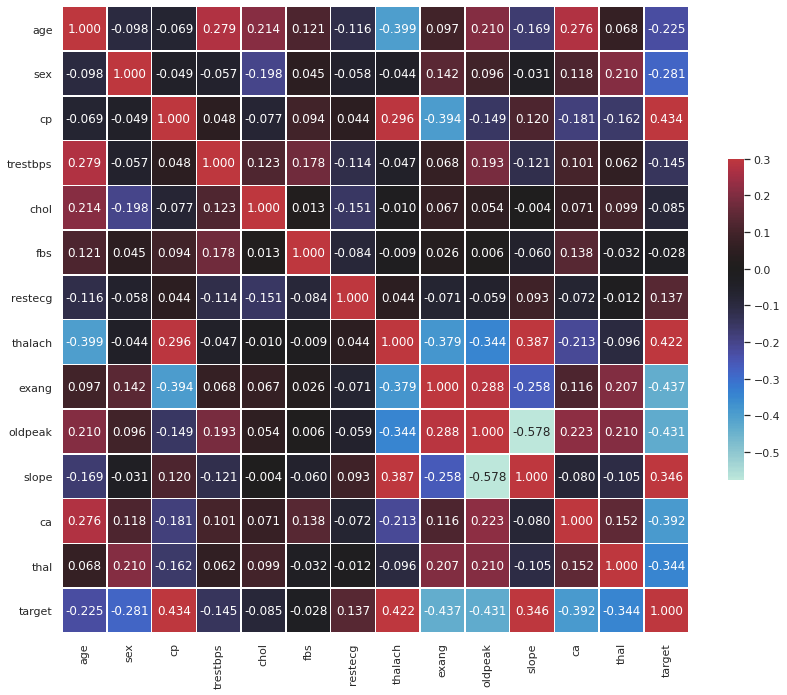

In [ ]:
plt.figure(figsize=(12,10))
#sns.heatmap(df.corr(), annot=True)
sns.heatmap(df.corr(), vmax=.3, center=0, fmt='.3f',
            square=True, linewidths=.5, cbar_kws={'shrink': .5}, annot=True)
plt.tight_layout()
plt.show()

* slope and old peak has high negative correlation of -0.58. This means if slope value increases then old peak will decrease and vice versa.
* Target and cp(chest pain) has the highest positive correlation of 0.43.

### Creating Dummy Variables

* Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

In [ ]:
a = pd.get_dummies(df['cp'], prefix='cp')
b = pd.get_dummies(df['thal'], prefix='thal')
c = pd.get_dummies(df['slope'], prefix='slope')

In [ ]:
frames = [df, a, b, c]
df = pd.concat(frames, axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0,0,0,1,0,0,0,1


In [ ]:
df = df.drop(columns=['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,0,1


### Scaling after train_test_split

In [ ]:
X = df.drop(['target'], axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#transpose matrices
X_train = X_train.T 
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T

### Model

#### SVM

In [ ]:
accuracies = {}
svm = SVC(random_state=1, probability=True)
#model = SVC(probability=True)

In [ ]:
print(svm.fit(X_train.T, y_train.T))
print('='*50)
acc = svm.score(X_test.T, y_test.T)*100
accuracies['SVM'] = acc
print('Test Accuracy of SVM Algorithm: {:.2f}%'.format(acc))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)
Test Accuracy of SVM Algorithm: 86.96%


In [ ]:
# Predicted values
y_head_svm = svm.predict(X_test.T)

In [ ]:
# Confusion  Matrix
print('Confusion Matrix：\n', confusion_matrix(y_test, y_head_svm), '\n')
print('='*50)
print('Classification Report：\n',classification_report(y_head_svm, y_test))

Confusion Matrix：
 [[15  3]
 [ 3 25]] 

Classification Report：
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.89      0.89      0.89        28

    accuracy                           0.87        46
   macro avg       0.86      0.86      0.86        46
weighted avg       0.87      0.87      0.87        46



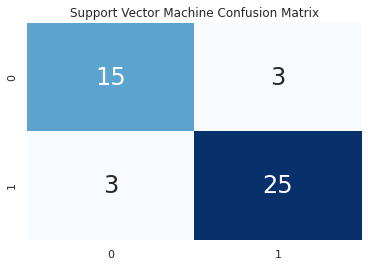

In [ ]:
plt.figure()
plt.title('Support Vector Machine Confusion Matrix')
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 24})